# Dimensionality Reduction

Feature extraction can be understood as an approach to compress data with the goal of maintaing the most relevant information.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# load dataset
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header= None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
'Alcalinity of ash', 'Magnesium', 'Total phenols', 
'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
# df_wine.head()

x, y = df_wine.iloc[:, 1:], df_wine.iloc[:, 0]
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.3, random_state = 0 )

## Principal Component Analysis

Warming up using the iris dataset as an example. [Link](http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html) to the warm up.

In [3]:
df = pd.read_csv(
    filepath_or_buffer = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header = None,
    sep = ','
)

df.columns = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna( how = "all", inplace = True ) # drops the empty line at file-end
df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
# split data table into data X and class labels y
x = df.iloc[:,0:4]
y = df.iloc[:,4]

Visualize the distribution of the four features in its original scale.

In [5]:
# available style to be used with ply.style.context
print plt.style.available

[u'dark_background', u'bmh', u'grayscale', u'ggplot', u'fivethirtyeight']


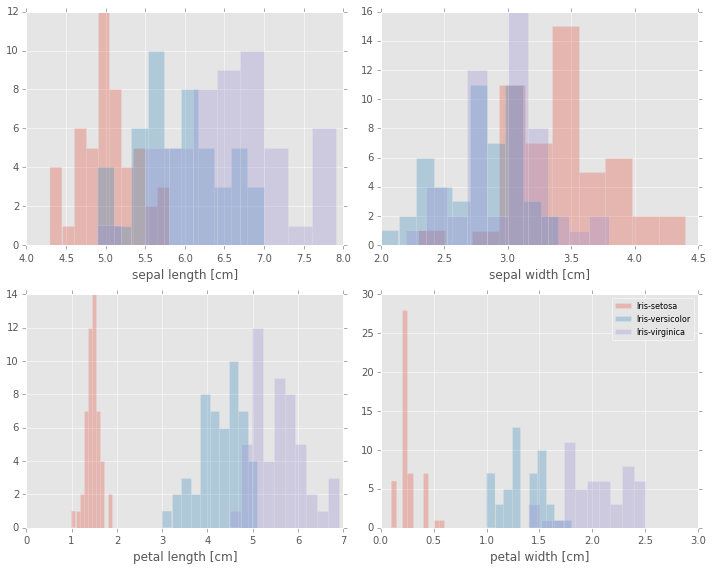

In [6]:
feature_dict = { 0: 'sepal length [cm]',
                 1: 'sepal width [cm]',
                 2: 'petal length [cm]',
                 3: 'petal width [cm]'}

# set the style only for this plot
with plt.style.context('ggplot') :
    
    plt.figure( figsize = ( 10, 8 ) )
    for i in range(4) :
        plt.subplot( 2, 2, i + 1 )
        
        for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica') :
            # only receives array type data, which can be accessed via .values
            plt.hist( x[ y == lab ][df.columns[i]].values, 
                      label = lab,
                      bins = 10,
                      alpha = 0.3 )
        plt.xlabel(feature_dict[i])
    
    plt.legend( loc = 'upper right', fancybox = True, fontsize = 8 )
    plt.tight_layout()    
    plt.show()

Covariance matrix calculation for feature $j$ and $k$.

$\sigma_{jk} = \frac{1}{n-1}\sum^N_{i=1}(x_{ij} - \bar{x_j})(x_{ik} - \bar{x_k})$

The whole matrix can be calculated using:

$\frac{1}{n-1} ( (X - \bar{x})^T( X - \bar{x}))$

Where $\bar{x}$ is the mean for each variable (feature).

Calculating the matrix by hand and matching the result with the `np.cov` function.

In [7]:
x_std = StandardScaler().fit_transform(x)

# axis = 0, for each column
mean_vec = np.mean( x_std, axis = 0 )
cov_mat  = (x_std - mean_vec).T.dot( (x_std - mean_vec) ) / ( x_std.shape[0] - 1 )
print( 'Covariance matrix \n%s' % cov_mat )

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [8]:
np.cov(x_std.T)

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

Back to the original wine dataset.

Note that pca is highly sensitive to data scaling. Steps to constructing a pca.

1. Standardize the d dimensional data.
2. Obtain the covariance matrix, and decompose it into its eigenvector and eigenvalues.

In [9]:
# step 1
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std  = sc.transform(x_test)

** Note that for np.cov, Each row of m represents a variable (feature) instead of an observation.**

In [10]:
# step 2
cov_mat = np.cov( x_train_std.T )
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print( "Eigenvalues \n%s" % eigen_vals )

Eigenvalues 
[ 4.8923083   2.46635032  1.42809973  1.01233462  0.84906459  0.60181514
  0.52251546  0.08414846  0.33051429  0.29595018  0.16831254  0.21432212
  0.2399553 ]


Plot the variance explained ratios of the eigenvalues. The plot below shows that the first principal componenet explains approximately 40 percent of the variance.

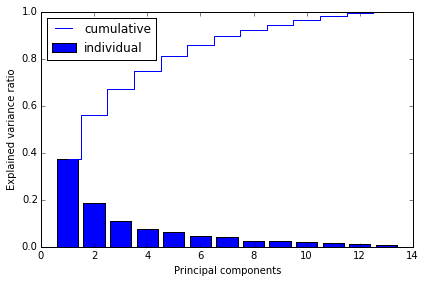

In [11]:
# calculate the variance ratio and cumsum
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted( eigen_vals, reverse = True ) ]
cum_var_exp = np.cumsum(var_exp)

# plot
plt.figure( figsize = ( 6, 4 ) )
plt.bar( range( 1, len(eigen_vals) + 1 ), var_exp, align = "center", label = "individual" )
plt.step( range( 1, len(eigen_vals) + 1 ), cum_var_exp, where = "mid", label = "cumulative" )
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

**A quick side note, comparing u of svd with pca eigenvector to show that they are identical.**

In [12]:
u,s,v = np.linalg.svd(x_train_std.T)
print "SVD\n %s" % u[0]
print "PCA\n %s" % eigen_vecs[0]

SVD
 [ -1.46698114e-01  -5.04170789e-01   1.17235150e-01  -2.06254611e-01
   1.87815947e-01  -1.48851318e-01   1.79263662e-01  -4.03054922e-01
   4.17197583e-01   4.13320786e-04  -4.03567189e-01   2.75660860e-01
   5.54687162e-02]
PCA
 [  1.46698114e-01   5.04170789e-01  -1.17235150e-01   2.06254611e-01
  -1.87815947e-01  -1.48851318e-01  -1.79263662e-01  -5.54687162e-02
  -4.03054922e-01  -4.17197583e-01   2.75660860e-01   4.03567189e-01
   4.13320786e-04]


**Perform feature transformation.**

Some differences between `sorted` and `.sort`.

- `sorted` returns a new sorted list.
- `.sort` directly sorts the original list.

In [13]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [ (np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(reverse=True)
eigen_pairs[:2]

[(4.8923083032737482,
  array([ 0.14669811, -0.24224554, -0.02993442, -0.25519002,  0.12079772,
          0.38934455,  0.42326486, -0.30634956,  0.30572219, -0.09869191,
          0.30032535,  0.36821154,  0.29259713])),
 (2.4663503157592306,
  array([ 0.50417079,  0.24216889,  0.28698484, -0.06468718,  0.22995385,
          0.09363991,  0.01088622,  0.01870216,  0.03040352,  0.54527081,
         -0.27924322, -0.174365  ,  0.36315461]))]

Obtain the first two eigen vector.

In [14]:
w = np.vstack((eigen_pairs[0][1],
               eigen_pairs[1][1])).T
w

array([[ 0.14669811,  0.50417079],
       [-0.24224554,  0.24216889],
       [-0.02993442,  0.28698484],
       [-0.25519002, -0.06468718],
       [ 0.12079772,  0.22995385],
       [ 0.38934455,  0.09363991],
       [ 0.42326486,  0.01088622],
       [-0.30634956,  0.01870216],
       [ 0.30572219,  0.03040352],
       [-0.09869191,  0.54527081],
       [ 0.30032535, -0.27924322],
       [ 0.36821154, -0.174365  ],
       [ 0.29259713,  0.36315461]])

Transformation the features into the first two principal component. And visualize the coordinates on the scatter plot.

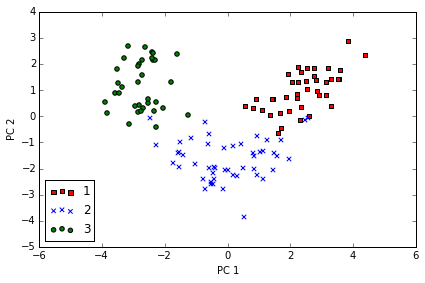

In [15]:
# transformation
x_train_pca = x_train_std.dot(w)

# plot
colors  = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip( y_train.unique(), colors, markers) :
    plt.scatter( x_train_pca[ y_train.values == l, 0 ], 
                 x_train_pca[ y_train.values == l, 1 ], 
                 c = c, label = l, marker = m )

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend( loc = 'lower left')
plt.tight_layout()
# plt.savefig('./figures/pca2.png', dpi=300)
plt.show()

PCA via sklearn

In [16]:
from sklearn.decomposition import PCA

# All principal components are kept and have a look at the explained variance ratio
pca = PCA()
x_train_pca = pca.fit_transform(x_train_std)
pca.explained_variance_ratio_

array([ 0.37329648,  0.18818926,  0.10896791,  0.07724389,  0.06478595,
        0.04592014,  0.03986936,  0.02521914,  0.02258181,  0.01830924,
        0.01635336,  0.01284271,  0.00642076])

In [17]:
# fitting after choosing the number of principal component
pca = PCA( n_components = 2 )
x_train_pca = pca.fit_transform(x_train_std)
x_test_pca  = pca.transform(x_test_std)

**Takeaway Note on PCA:** It is a unsupervised method, meaning that information about the class labels is ignored.